In [1]:
from PIL import Image
import numpy as np


blocks getting function

In [2]:
def getblocks(image: np.ndarray, blockshape: tuple, moveAxis: bool = True, info: bool = False, addChannel: bool = True) -> np.ndarray:
    '''
    takes the array of image in grey= 2D and in RGB = 3D
    takes the numpy array and converts it the the blocks in the fastest way
    '''
    if(info):
        print("Image Shape:", image.shape)
        print("Block Shape:", blockshape)

    oldshape = list(image.shape)
    if addChannel and len(image.shape) == 2:
        mode = "grey"
        image = image.reshape((*image.shape, 1))
    else:
        mode = "color"

    if addChannel:
        img_height, img_width, channels = image.shape
    else:
        img_height, img_width = image.shape

    tile_height, tile_width = blockshape

    if addChannel:
        shp = img_height//tile_height, tile_height, img_width//tile_width, tile_width, channels
    else:
        shp = img_height//tile_height, tile_height, img_width//tile_width, tile_width

    def printinfo():
        print("Old Shape:", oldshape)
        print("Image Shape:", image.shape)
        print("Block Shape:", blockshape)
        print("New Shape Initial:", shp)
        print("img_height % tile_height != 0 :", img_height % tile_height != 0)
        print("img_width % tile_width != 0 :", img_width % tile_width != 0)

    if img_height % tile_height != 0 or img_width % tile_width != 0:
        print("warning: Block size is not fit for the image!")
        printinfo()

    if(info):
        printinfo()

    tiled_array = image.reshape(shp)
    tiled_array = tiled_array.swapaxes(1, 2)

    if moveAxis:
        if(addChannel):
            tiled_array = tiled_array.reshape(-1,
                                              *(tile_height, tile_width, channels))
            tiled_array = np.moveaxis(tiled_array, source=len(
                tiled_array.shape)-1, destination=1)
        else:
            tiled_array = tiled_array.reshape(-1, *(tile_height, tile_width))

    return tiled_array


In [3]:


def combineBlocks(tiled_array: np.ndarray, imageshape: tuple, blockshape: tuple, movedAxis: bool = True) -> np.ndarray:

    if len(imageshape) == 2:
        mode = "grey"
        imageshape = *imageshape, 1
    else:
        mode = "color"

    img_height, img_width, channels = imageshape
    tile_height, tile_width = blockshape

    if movedAxis:
        image = tiled_array.copy()
        image = image.reshape(img_height//tile_height, tile_height,
                              img_width//tile_width, tile_width, channels)
        swapaxisShape = list(image.shape)
        swapaxisShape[1], swapaxisShape[2] = swapaxisShape[2], swapaxisShape[1]
        image = image.reshape(swapaxisShape)
        image = image.swapaxes(1, 2)
    else:
        image = tiled_array
        # IDK have completed this else case. Btw we aren't using this case lol :)

    return image.reshape(imageshape)


In [4]:
def printnd(arr: np.ndarray):
    print("Shape:", arr.shape)
    print("Strides:", arr.strides)
    print(arr)


importing image
e.g lena which is 512x512
importing as the grey image denoted by L flag

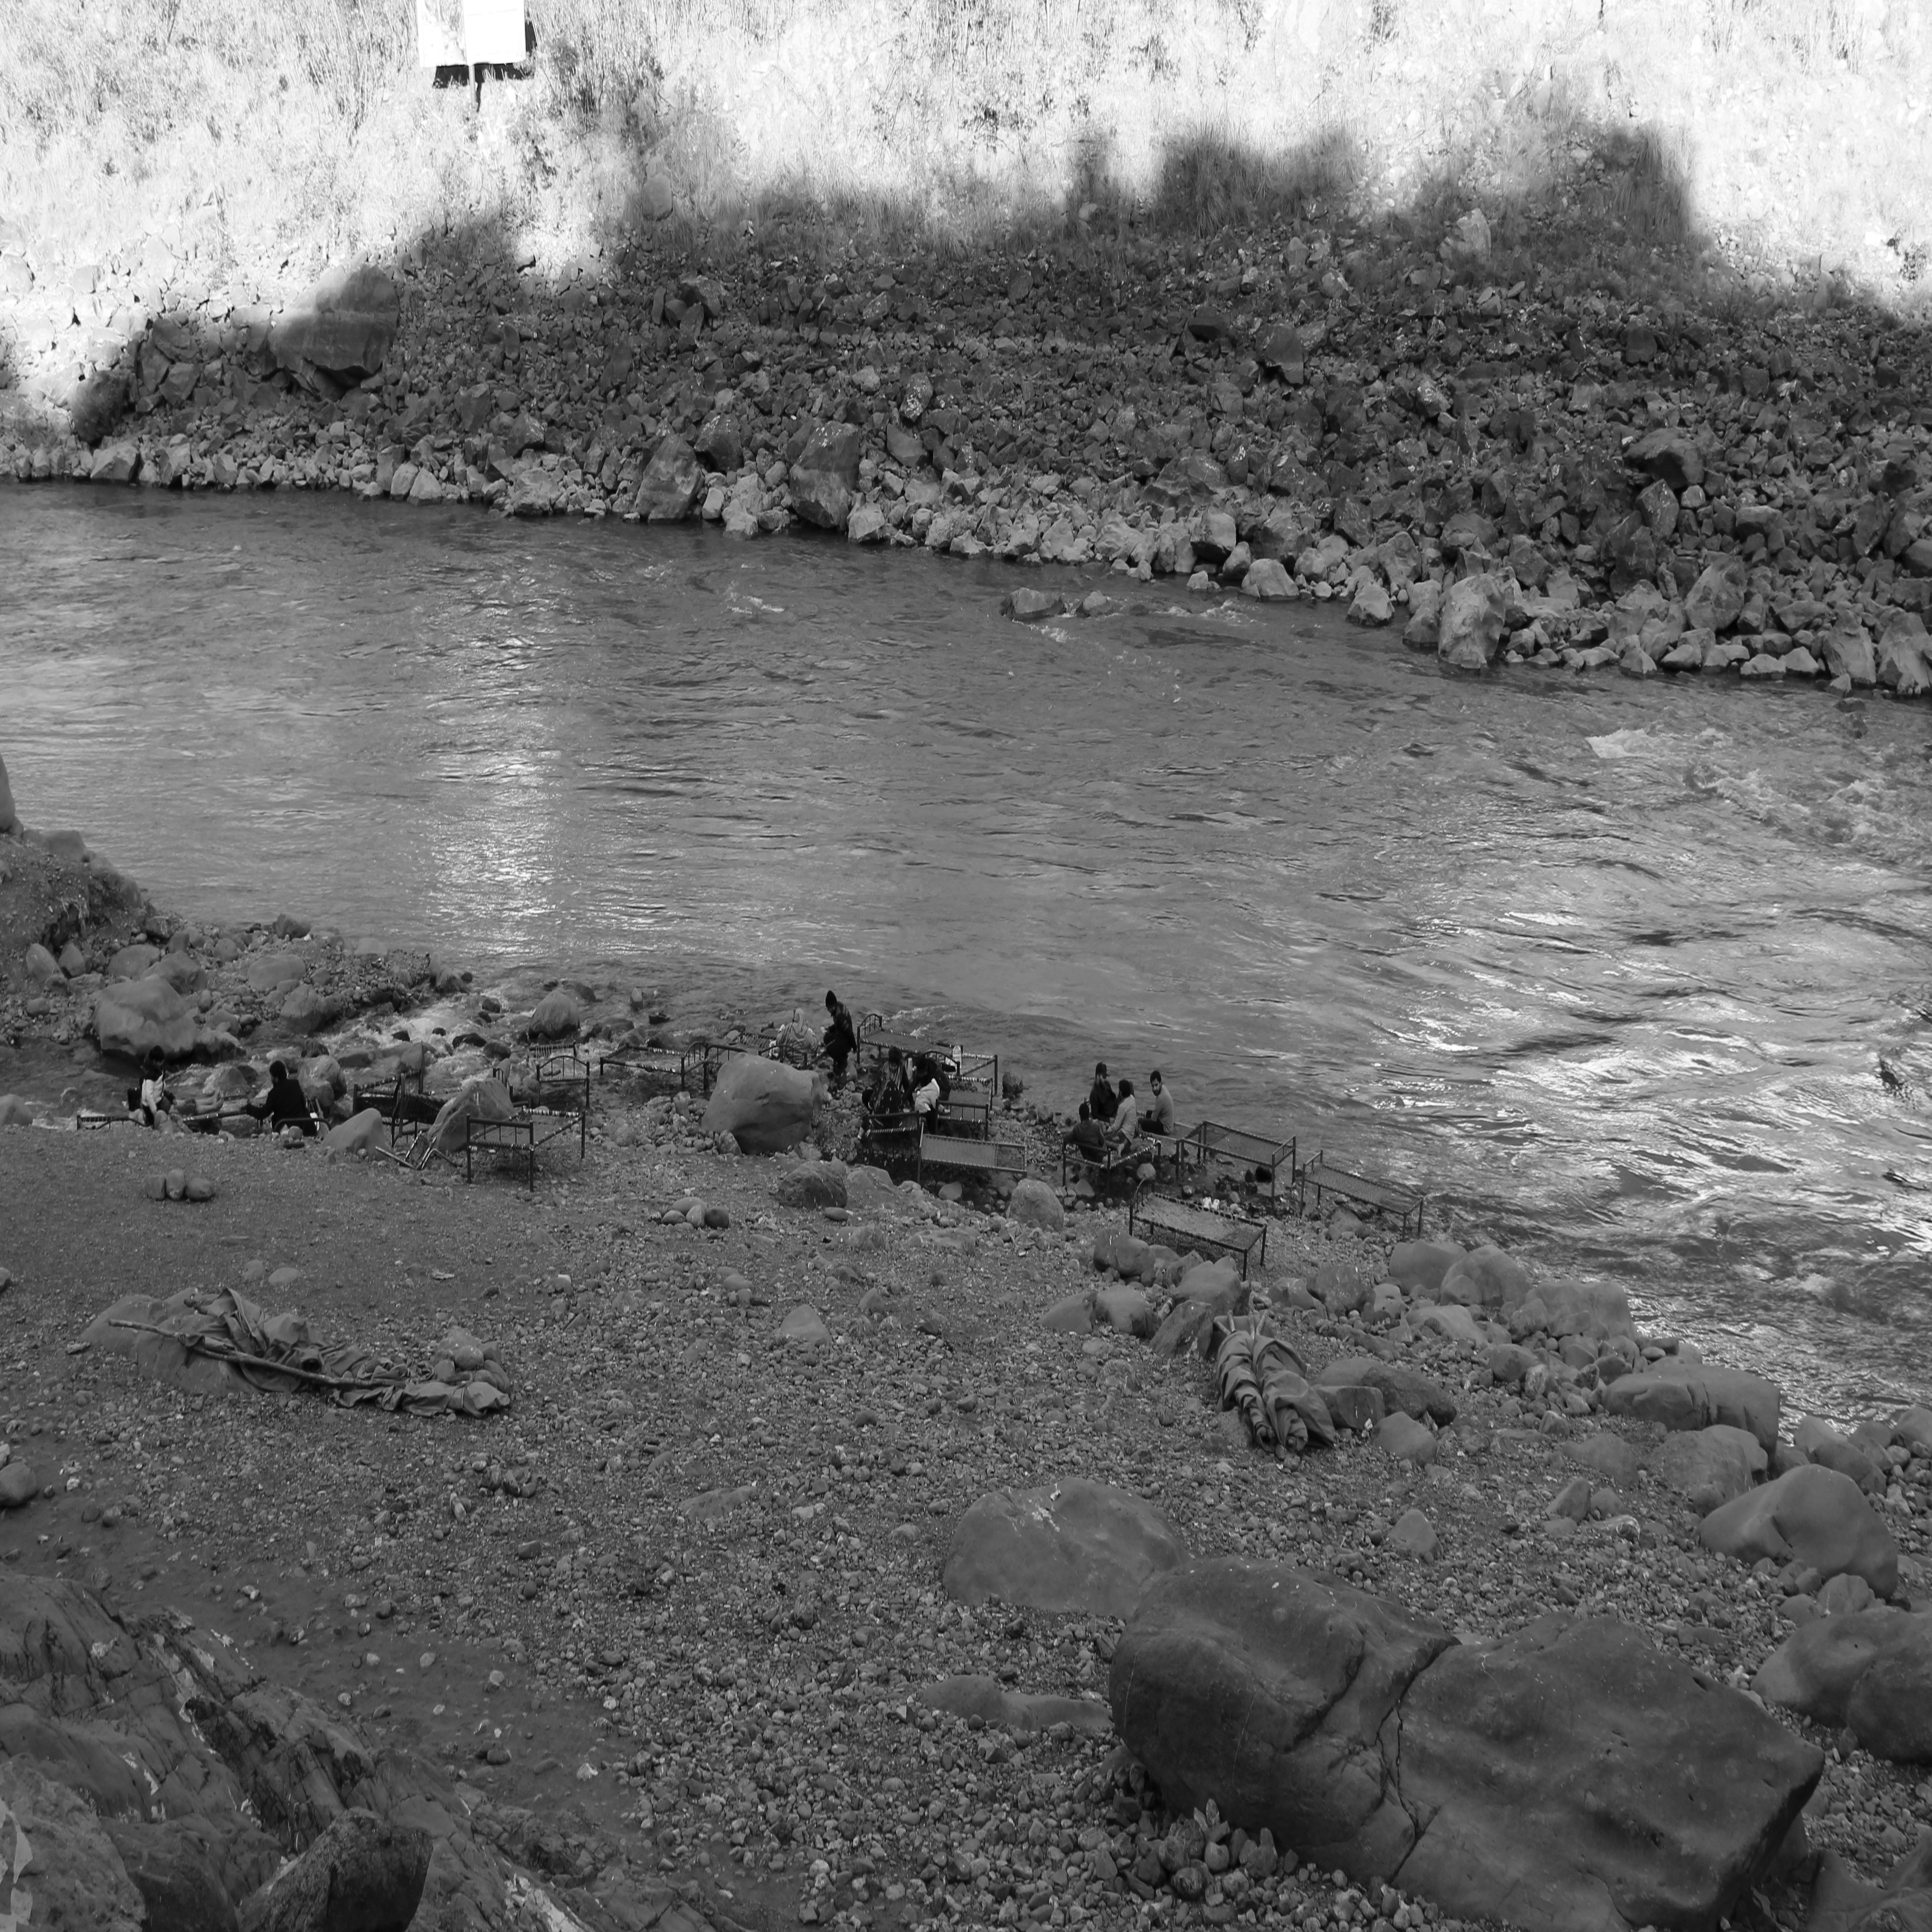

In [5]:
lena = Image.open("fyp_image.jpg").convert("RGB")
lena


In [6]:
lena.mode


'L'

converting to np array

In [7]:
img = np.array(lena)
imgSize = img.shape
img.shape, img.strides, img


((3456, 3456),
 (3456, 1),
 array([[207, 209, 215, ..., 236, 238, 241],
        [210, 204, 210, ..., 233, 234, 239],
        [222, 213, 216, ..., 229, 231, 238],
        ...,
        [132, 133, 134, ...,  66,  65,  66],
        [133, 137, 137, ...,  67,  68,  66],
        [133, 134, 134, ...,  67,  70,  69]], dtype=uint8))

making 16 main blocks
size of single main block S= M/sqrt(16) X T=N/sqrt(16)
e.g for lena the 512x512 the partner blocks size would be 16 blocks each with size (512x512)/(4x4) = 128x128

In [8]:
mainblockSize = (int(imgSize[0]/4), int(imgSize[1]/4))
mainblocks = getblocks(img.copy(), mainblockSize, info=True)
mainblocks.shape, mainblocks.strides, mainblocks


Image Shape: (3456, 3456)
Block Shape: (864, 864)
Old Shape: [3456, 3456]
Image Shape: (3456, 3456, 1)
Block Shape: (864, 864)
New Shape Initial: (4, 864, 4, 864, 1)
img_height % tile_height != 0 : False
img_width % tile_width != 0 : False


((16, 1, 864, 864),
 (746496, 1, 864, 1),
 array([[[[207, 209, 215, ..., 255, 255, 255],
          [210, 204, 210, ..., 255, 255, 255],
          [222, 213, 216, ..., 255, 255, 255],
          ...,
          [ 65,  65,  63, ..., 116, 114, 112],
          [ 71,  66,  64, ..., 111, 113, 113],
          [ 69,  67,  65, ..., 106, 114, 111]]],
 
 
        [[[255, 255, 255, ..., 193, 205, 165],
          [255, 255, 255, ..., 139, 176, 158],
          [255, 255, 255, ...,  99, 133, 153],
          ...,
          [112, 111, 110, ..., 129, 135, 141],
          [111, 111, 112, ..., 131, 133, 139],
          [112, 114, 115, ..., 133, 133, 137]]],
 
 
        [[[202, 247, 231, ..., 243, 243, 242],
          [202, 250, 240, ..., 241, 240, 243],
          [203, 250, 242, ..., 240, 240, 241],
          ...,
          [144, 153, 153, ...,  72,  73,  76],
          [141, 148, 150, ...,  72,  70,  67],
          [141, 147, 145, ...,  69,  66,  66]]],
 
 
        ...,
 
 
        [[[ 96, 143, 149, ...,  

here the main blocks are like this index.
1st index is the block number.
2nd index is the channel (RGB) or 0 in Grey.
3rd and 4th are for indexing the block.

lookup table

In [9]:
#Image.open("lookup.png")

In [10]:
lookup = np.array([[0, 7, 13, 10],
                  [1, 6, 12, 11],
                  [4, 2, 9, 15],
                  [5, 3, 8, 14]], dtype=np.uint8)
lookup

array([[ 0,  7, 13, 10],
       [ 1,  6, 12, 11],
       [ 4,  2,  9, 15],
       [ 5,  3,  8, 14]], dtype=uint8)

here the every row represents the partner blocks
e.g
A1 will be lookup[0][0].
A2 will be lookup[0][2].
D2 will be lookup[3][2].


Step3
Ab har main block ko divide karo k 4x4 k block ban jain
numberOfBlocks=(SxT)/(4x4)
e.g 128x128/4x4 = 1024


In [11]:
avgblocksSize = (4, 4)
averages = np.zeros((16, int((mainblockSize[0]*mainblockSize[1]) /
                             (avgblocksSize[0]*avgblocksSize[1]))), dtype=np.uint8)
# 4 indicatior A,B,C,D, 4 blocks of A, then the 4x4 Blocks which have count = (SxT)/(4x4), e.g 1024


storing the averages of A, B, C, D

In [12]:
tmp=getblocks(mainblocks[0][0], avgblocksSize,
          info=False, addChannel=False)
tmp.shape, tmp

((46656, 4, 4),
 array([[[207, 209, 215, 215],
         [210, 204, 210, 218],
         [222, 213, 216, 222],
         [232, 222, 220, 222]],
 
        [[206, 208, 221, 227],
         [205, 196, 205, 226],
         [209, 189, 192, 210],
         [215, 192, 185, 205]],
 
        [[218, 218, 219, 217],
         [217, 218, 218, 219],
         [225, 219, 214, 219],
         [232, 233, 216, 222]],
 
        ...,
 
        [[118, 109, 114, 119],
         [110, 102, 109, 111],
         [100,  97, 104, 100],
         [ 96,  95, 100,  95]],
 
        [[119, 113, 111, 114],
         [107, 104, 105, 110],
         [ 95,  91,  91, 102],
         [ 97,  93,  86,  95]],
 
        [[115, 114, 113, 113],
         [115, 116, 114, 112],
         [110, 111, 113, 113],
         [101, 106, 114, 111]]], dtype=uint8))

In [13]:
lookup

array([[ 0,  7, 13, 10],
       [ 1,  6, 12, 11],
       [ 4,  2,  9, 15],
       [ 5,  3,  8, 14]], dtype=uint8)

In [14]:
for partner in lookup:  # A,B,C,D
    for id in partner:  # A1,A2,A3.....D4 etc
        averages[id] = getblocks(mainblocks[id][0], avgblocksSize,
                                 info=False, addChannel=False).mean((1, 2))
averages.shape, averages


((16, 46656),
 array([[216, 205, 220, ..., 104, 102, 111],
        [255, 255, 255, ..., 141, 150, 138],
        [218, 144, 187, ...,  33,  51,  69],
        ...,
        [118, 103,  92, ..., 111,  84,  77],
        [ 46,  94,  69, ..., 109,  98, 111],
        [ 96,  88,  87, ...,  72,  71,  67]], dtype=uint8))

array([[162, 162, 162, 161],
       [162, 162, 162, 161],
       [162, 162, 162, 161],
       [162, 162, 162, 161]], dtype=uint8)
this will give you the avg 161. But it sould be 162 as it's dominant. Minor improvemnt reuqired

now we have average of every mainblock according to 4x4. Which in total are 1024

time to convert them into the binary

In [15]:
averageBits = np.unpackbits(averages, axis=1)
averageBits.shape, averageBits


((16, 373248),
 array([[1, 1, 0, ..., 1, 1, 1],
        [1, 1, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 1, 0, 1],
        ...,
        [0, 1, 1, ..., 1, 0, 1],
        [0, 0, 1, ..., 1, 1, 1],
        [0, 1, 1, ..., 0, 1, 1]], dtype=uint8))

merging partner blocks average to make the recovery bits


In [16]:
recoveryBits = np.zeros((averageBits.shape[0], averageBits.shape[1]*3), dtype=np.uint8)
for partner in lookup:  # A,B,C,D
    for id in partner:  # A1,A2,A3.....D4 etc
        recoveryBits[id] = np.concatenate(
            [averageBits[i] for i in partner if i != id])

recoveryBits.shape, recoveryBits


((16, 1119744),
 array([[0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 1, 1],
        [0, 1, 0, ..., 0, 1, 1],
        ...,
        [1, 1, 0, ..., 0, 1, 0],
        [0, 1, 1, ..., 1, 1, 0],
        [0, 1, 0, ..., 0, 1, 1]], dtype=uint8))

password or key generation

In [17]:
import hashlib

In [18]:
# password or key
password = "this is my password"
key = [x for x in hashlib.sha256(password.encode()).digest()]
len(key)


32

permuttaion or shuffling

In [19]:
for i in range(recoveryBits.shape[0]):
    np.random.RandomState(seed=key).shuffle(recoveryBits[i])

recoveryBits.shape, recoveryBits


((16, 1119744),
 array([[1, 0, 1, ..., 1, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [0, 1, 0, ..., 1, 1, 1],
        ...,
        [1, 0, 1, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [1, 1, 1, ..., 1, 0, 1]], dtype=uint8))

Recovery bits creation completed
Now we need to make the space to put these recovery bits

### Making 16x16 for Step 8
Dividing the main blocks to 16x16 blocks
Total blocks = SxT/16x16 = 128x128/16x16 = 64 Blocks

In [20]:
mainblocks.shape

(16, 1, 864, 864)

In [21]:
blocks16x16Size = (16, 16)
# reshaping because we needed that shape
blocks16x16 = mainblocks.reshape(
    *mainblocks.shape[:-2],
    int((mainblockSize[0]*mainblockSize[1]) /
        (blocks16x16Size[0]*blocks16x16Size[1])),
    blocks16x16Size[0], blocks16x16Size[1])

blocks16x16Size, blocks16x16.shape, blocks16x16.strides, blocks16x16


((16, 16),
 (16, 1, 2916, 16, 16),
 (746496, 746496, 256, 16, 1),
 array([[[[[207, 209, 215, ..., 212, 200, 205],
           [208, 205, 217, ..., 168, 188, 205],
           [195, 191, 186, ..., 219, 213, 208],
           ...,
           [203, 215, 219, ..., 198, 216, 226],
           [227, 221, 226, ..., 218, 209, 211],
           [216, 201, 191, ..., 223, 229, 230]],
 
          [[226, 226, 227, ..., 210, 203, 205],
           [220, 227, 225, ..., 194, 190, 198],
           [212, 199, 177, ..., 190, 144, 143],
           ...,
           [196, 193, 209, ..., 219, 221, 222],
           [219, 218, 208, ..., 215, 210, 204],
           [212, 213, 214, ..., 203, 198, 199]],
 
          [[205, 206, 201, ..., 185, 203, 226],
           [231, 234, 218, ..., 227, 210, 202],
           [213, 222, 224, ..., 210, 214, 217],
           ...,
           [201, 220, 246, ..., 177, 166, 191],
           [218, 213, 218, ..., 255, 255, 255],
           [254, 254, 255, ..., 240, 240, 241]],
 
          ...

In [22]:
for block, mainblock in zip(blocks16x16, mainblocks):
    block[0] = getblocks(mainblock[0], blocks16x16Size,
                         info=False, addChannel=False)

blocks16x16.shape, blocks16x16.strides, blocks16x16


((16, 1, 2916, 16, 16),
 (746496, 746496, 256, 16, 1),
 array([[[[[207, 209, 215, ..., 212, 200, 205],
           [210, 204, 210, ..., 210, 198, 209],
           [222, 213, 216, ..., 213, 204, 219],
           ...,
           [196, 186, 208, ..., 215, 220, 231],
           [197, 180, 197, ..., 220, 216, 224],
           [211, 186, 189, ..., 227, 220, 222]],
 
          [[208, 205, 217, ..., 168, 188, 205],
           [218, 205, 211, ..., 170, 185, 210],
           [227, 206, 211, ..., 175, 187, 206],
           ...,
           [232, 232, 225, ..., 205, 198, 191],
           [235, 227, 215, ..., 210, 200, 187],
           [235, 230, 207, ..., 213, 204, 191]],
 
          [[195, 191, 186, ..., 219, 213, 208],
           [200, 186, 176, ..., 219, 225, 216],
           [198, 180, 176, ..., 217, 226, 221],
           ...,
           [209, 213, 214, ..., 221, 223, 229],
           [192, 207, 219, ..., 221, 225, 231],
           [190, 209, 220, ..., 218, 224, 229]],
 
          ...,
 
       

### Making 8x8 blocks of those 16x16  Step 9

In [23]:
blocks16x16.shape

(16, 1, 2916, 16, 16)

In [24]:
blocks8x8Size = (8, 8)
# reshaping because we needed that shape
blocks8x8 = blocks16x16.reshape(
    *blocks16x16.shape[:-2],
    int((blocks16x16Size[0]*blocks16x16Size[1]) /
        (blocks8x8Size[0]*blocks8x8Size[1])),
    blocks8x8Size[0], blocks8x8Size[1])

blocks8x8Size, blocks8x8.shape, blocks8x8.strides, blocks8x8


((8, 8),
 (16, 1, 2916, 4, 8, 8),
 (746496, 746496, 256, 64, 8, 1),
 array([[[[[[207, 209, 215, ..., 208, 221, 227],
            [218, 218, 219, ..., 212, 200, 205],
            [210, 204, 210, ..., 196, 205, 226],
            ...,
            [225, 219, 214, ..., 213, 204, 219],
            [232, 222, 220, ..., 192, 185, 205],
            [232, 233, 216, ..., 222, 214, 222]],
 
           [[241, 237, 226, ..., 196, 188, 210],
            [233, 238, 223, ..., 229, 224, 223],
            [243, 239, 227, ..., 203, 196, 210],
            ...,
            [222, 236, 230, ..., 234, 237, 231],
            [224, 226, 221, ..., 214, 210, 206],
            [206, 218, 223, ..., 234, 240, 237]],
 
           [[211, 218, 221, ..., 217, 216, 208],
            [203, 206, 215, ..., 236, 240, 243],
            [213, 218, 225, ..., 219, 219, 216],
            ...,
            [230, 210, 194, ..., 230, 238, 243],
            [207, 208, 224, ..., 219, 226, 234],
            [238, 215, 199, ..., 222, 232,

In [25]:
blocks8x8.shape

(16, 1, 2916, 4, 8, 8)

In [26]:
for block, block16x16 in zip(blocks8x8, blocks16x16):
    for i in range(block16x16[0].shape[0]):
        block[0][i] = getblocks(block16x16[0][i], blocks8x8Size,
                                info=False, addChannel=False)

blocks8x8.shape, blocks8x8.strides, blocks8x8


((16, 1, 2916, 4, 8, 8),
 (746496, 746496, 256, 64, 8, 1),
 array([[[[[[207, 209, 215, ..., 208, 221, 227],
            [210, 204, 210, ..., 196, 205, 226],
            [222, 213, 216, ..., 189, 192, 210],
            ...,
            [243, 239, 227, ..., 203, 196, 210],
            [240, 233, 225, ..., 213, 204, 209],
            [224, 226, 221, ..., 214, 210, 206]],
 
           [[218, 218, 219, ..., 212, 200, 205],
            [217, 218, 218, ..., 210, 198, 209],
            [225, 219, 214, ..., 213, 204, 219],
            ...,
            [232, 237, 230, ..., 232, 233, 226],
            [222, 236, 230, ..., 234, 237, 231],
            [206, 218, 223, ..., 234, 240, 237]],
 
           [[211, 218, 221, ..., 217, 216, 208],
            [213, 218, 225, ..., 219, 219, 216],
            [212, 215, 224, ..., 220, 220, 226],
            ...,
            [196, 186, 208, ..., 230, 227, 232],
            [197, 180, 197, ..., 229, 226, 233],
            [211, 186, 189, ..., 225, 224, 234]],
 

Now put the recovery bit in the first and second LSB of blocks4x4


In [27]:
blocks8x8.shape

(16, 1, 2916, 4, 8, 8)

In [28]:
recoveryBits.reshape(recoveryBits.shape[0], int(recoveryBits.shape[1]//2), 2).shape


(16, 559872, 2)

In [29]:
recoveryBits[0]

array([1, 0, 1, ..., 1, 0, 1], dtype=uint8)

In [30]:
recoveryBits.shape, blocks8x8.shape[2]*3*8*8*2

((16, 1119744), 1119744)

In [31]:
blocks8x8[:, 0, :, :3, :, :].shape, blocks8x8[:, 0, :, :3, :,
                                              :][0].shape, blocks8x8[:, 0, :, :3, :, :][0].flatten().shape


((16, 2916, 3, 8, 8), (2916, 3, 8, 8), (559872,))

updating the lsb

In [32]:
def set_bit(value, index, x):
    """Set the index:th bit of v to 1 if x is truthy, else to 0, and return the new value."""
    mask = 1 << index   # Compute mask, an integer with just bit 'index' set.
    # Clear the bit indicated by the mask (if x is False)
    value &= ~mask
    if x:
        # If x was True, set the bit indicated by the mask.
        value |= mask
    return value            # Return the result, we're done.


In [33]:
set_bit(2,1,0),set_bit(2,2,1)

(0, 6)

In [34]:
for mainblock, blockbits in zip(blocks8x8[:, 0, :, :3, :, :], recoveryBits.reshape(recoveryBits.shape[0], int(recoveryBits.shape[1]//2), 2)):
    for number, bits in zip(tmp.flat, blockbits):
        # print(number, bits)
        number = set_bit(set_bit(number, 0, bits[0]), 1, bits[1])

blocks8x8.shape, blocks8x8.strides, blocks8x8


((16, 1, 2916, 4, 8, 8),
 (746496, 746496, 256, 64, 8, 1),
 array([[[[[[207, 209, 215, ..., 208, 221, 227],
            [210, 204, 210, ..., 196, 205, 226],
            [222, 213, 216, ..., 189, 192, 210],
            ...,
            [243, 239, 227, ..., 203, 196, 210],
            [240, 233, 225, ..., 213, 204, 209],
            [224, 226, 221, ..., 214, 210, 206]],
 
           [[218, 218, 219, ..., 212, 200, 205],
            [217, 218, 218, ..., 210, 198, 209],
            [225, 219, 214, ..., 213, 204, 219],
            ...,
            [232, 237, 230, ..., 232, 233, 226],
            [222, 236, 230, ..., 234, 237, 231],
            [206, 218, 223, ..., 234, 240, 237]],
 
           [[211, 218, 221, ..., 217, 216, 208],
            [213, 218, 225, ..., 219, 219, 216],
            [212, 215, 224, ..., 220, 220, 226],
            ...,
            [196, 186, 208, ..., 230, 227, 232],
            [197, 180, 197, ..., 229, 226, 233],
            [211, 186, 189, ..., 225, 224, 234]],
 

### Now to combine the blocks back to Image

In [35]:
raise Exception("Below code is not in running form")

Exception: Below code is not in running form

In [ ]:
avgblocksSize = (4, 4)
# reshaping because we needed that shape
avgblocks = mainblocks.reshape(
    *mainblocks.shape[:-2],
    int((mainblockSize[0]*mainblockSize[1]) /
        (avgblocksSize[0]*avgblocksSize[1])),
    avgblocksSize[0], avgblocksSize[1])

avgblocksSize, avgblocks.shape, avgblocks.strides, avgblocks


In [ ]:
block=avgblocks[0][0]
block.shape, block.strides, block

In [ ]:
avgblocks.shape, avgblocks.strides

In [ ]:
avgblocksSize

In [ ]:
for block, mainblock in zip(avgblocks, mainblocks):
    block[0] = getblocks(mainblock[0], avgblocksSize,
                         info=False, addChannel=False)

avgblocks.shape, avgblocks.strides, avgblocks


In [ ]:
avgblocks[0][0].reshape(-1).shape

In [ ]:
mainblock[0][0].reshape(-1).shape

In [ ]:
avgblocks[0][0].reshape(-1)==mainblock[0][0].reshape(-1)